<a href="https://colab.research.google.com/github/nilaynishant/AIMLTutorial/blob/main/01_geospatial_data_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Setup and data download


In [1]:
%%capture
if 'google.colab' in str(get_ipython()):
# run this only if you have not installed the requried packages
  !pip install rasterio
  !pip install geopandas
  !pip install gitpython
  !pip install leafmap
  !pip install localtileserver

In [2]:
import os
import rasterio as rio
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import leafmap

In [3]:
# Data download
data_url = (
    'https://github.com/nilaynishant/AIMLTutorial/blob/main/Data/Sentinel2_Agartala.tif'
)
leafmap.download_file(data_url, 'sentinel.tif', unzip=False)

Downloading...
From: https://raw.githubusercontent.com/nilaynishant/AIMLTutorial/main/Data/Sentinel2_Agartala.tif
To: /content/sentinel.tif
100%|██████████| 36.9M/36.9M [00:00<00:00, 84.7MB/s]


'/content/sentinel.tif'

In [4]:
raster_loc='sentinel.tif'

In [5]:
src = rio.open(raster_loc)

blue = src.read(4, masked=True)
green = src.read(3, masked=True)
red = src.read(2, masked=True)
nir = src.read(1, masked=True)

def normalize(array):
    """Normalizes numpy arrays into scale 0.0 - 1.0"""
    array_min, array_max = array.min(), array.max()
    return ((array - array_min)/(array_max - array_min))

# Normalize the bands
redn = normalize(red)
greenn = normalize(green)
bluen = normalize(blue)
nirn = normalize(nir)

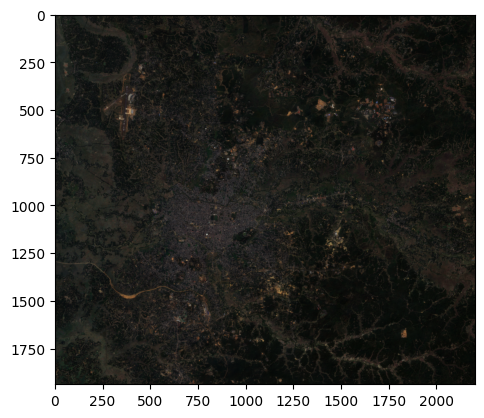

In [6]:
rgb = np.dstack((redn, greenn, bluen))
plt.imshow(rgb)

In [10]:
import rasterio as rio
from rasterio.plot import show
from rasterio import Affine
from rasterio.enums import Resampling
from rasterio.transform import from_origin
import numpy as np
import os

# Open raster
src = rio.open(raster_loc)

# Read bands (Assuming Band 1 = NIR, Band 2 = Red as per your order)
nir = src.read(1, masked=True).astype('float32')
red = src.read(2, masked=True).astype('float32')

# Calculate NDVI
ndvi = (nir - red) / (nir + red)
ndvi = np.ma.masked_invalid(ndvi)

# Output path
output_path = "ndvi_output.tif"

# Save the NDVI to GeoTIFF
kwargs = src.meta
kwargs.update({
    'count': 1,
    'dtype': 'float32',
    'driver': 'GTiff',
    'compress': 'lzw'
})

with rio.open(output_path, 'w', **kwargs) as dst:
    dst.write(ndvi.filled(np.nan), 1)

print(f"NDVI saved to {output_path}")

NDVI saved to ndvi_output.tif


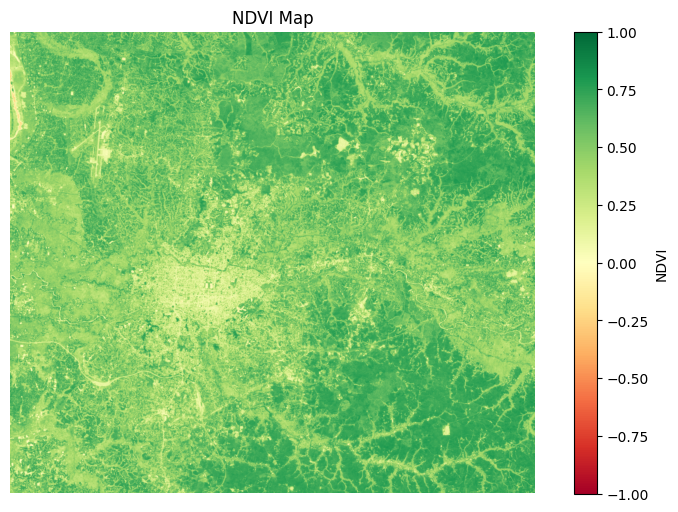

In [11]:
# Display NDVI
plt.figure(figsize=(10, 6))
ndvi_plot = plt.imshow(ndvi, cmap='RdYlGn', vmin=-1, vmax=1)
plt.colorbar(ndvi_plot, label='NDVI')
plt.title("NDVI Map")
plt.axis('off')
plt.show()

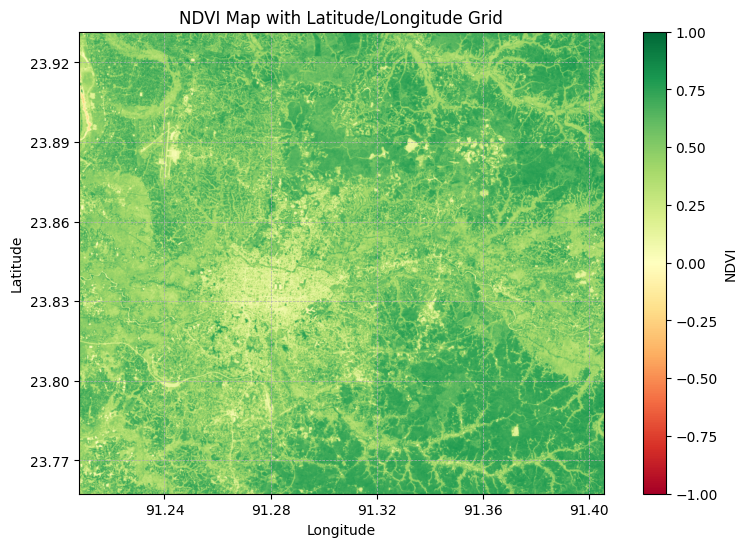

In [13]:
import rasterio as rio
import numpy as np
import matplotlib.pyplot as plt
from rasterio.plot import show
import matplotlib.ticker as ticker

# Open raster
src = rio.open(raster_loc)

# Read bands (assuming Band 1 = NIR, Band 2 = Red)
nir = src.read(1, masked=True).astype('float32')
red = src.read(2, masked=True).astype('float32')

# Calculate NDVI
ndvi = (nir - red) / (nir + red)
ndvi = np.ma.masked_invalid(ndvi)

# Get extent in spatial coordinates
bounds = src.bounds  # (left, bottom, right, top)
extent = [bounds.left, bounds.right, bounds.bottom, bounds.top]

# Plot NDVI with lat/lon grid
fig, ax = plt.subplots(figsize=(10, 6))
ndvi_img = ax.imshow(ndvi, cmap='RdYlGn', extent=extent, vmin=-1, vmax=1)
plt.colorbar(ndvi_img, label='NDVI', ax=ax)
ax.set_title("NDVI Map with Latitude/Longitude Grid")

# Set axis labels
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

# Enable grid
ax.grid(True, linestyle='--', linewidth=0.5)

# Format ticks to show geographic coordinates
ax.xaxis.set_major_locator(ticker.MaxNLocator(nbins=6))
ax.yaxis.set_major_locator(ticker.MaxNLocator(nbins=6))

plt.show()

## Exrecise
Plot the sentinel data as FCC